In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [8]:
image = cv2.imread('sar_1.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 

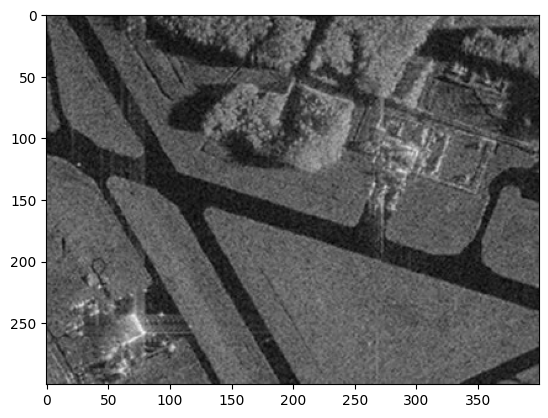

In [9]:
plt.imshow(image_gray, cmap="gray")

# Алгоритм разрастания регионов

In [10]:
import math
def homo_average(img, mask, point, T):
    av_val = img[mask > 0].sum() / np.count_nonzero(img[mask > 0])
                                                            
    if abs(av_val - img[point]) <= T:
        return True
    
    return False
    

In [11]:
def region_growing(image, seed_point,homo_fun,r, T):
    mask = np.zeros(image_gray.shape, np.uint8)
    mask[seed_point] = 1
    count = 1
    while count > 0:
        count = 0
        local_mask = np.zeros(image_gray.shape, np.uint8)
        for i in range(r,image.shape[0] - r):
            for j in range(r,image.shape[1] - r):
                if mask[i,j]==0 and mask[i - r:i + r, j-r: j+r].sum() > 0:
                    if homo_fun(image, mask, (i,j), T):
                        local_mask[i,j] = 1
        count = np.count_nonzero(local_mask)
        print(count)
        mask += local_mask
        
    return mask*255
    

In [12]:
seed_point = (250,250)
mask = region_growing(image_gray,seed_point,homo_average,1, 10)

3
4
4
5
7
6
6
9
7
6
6
9
13
12
15
17
13
13
16
16
14
16
15
16
10
11
14
13
14
10
10
14
17
15
36
22
21
18
21
21
25
23
43
31
34
23
20
27
29
35
40
32
35
42
48
52
30
23
20
19
19
20
18
22
74
24
26
29
30
27
29
29
28
29
20
17
17
21
20
25
23
24
20
18
19
15
18
18
15
18
13
10
9
7
9
9
10
11
12
10
12
11
8
9
7
4
3
6
6
6
5
5
5
3
2
2
2
1
0


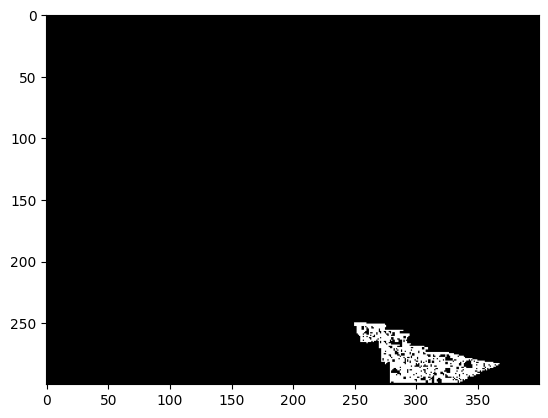

In [13]:
plt.imshow(mask, cmap="gray")

# K-means

In [7]:
# Define criteria = ( type, max_iter = 10 , epsilon = 1.0 )
# criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)

In [8]:
flags = cv2.KMEANS_RANDOM_CENTERS

In [10]:
z = image_gray.reshape((-1,3))
# convert to np.float32
z = np.float32(z)
# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 3
ret,label,center=cv2.kmeans(z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
# Now convert back into uint8, and make original image
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((image_gray.shape))

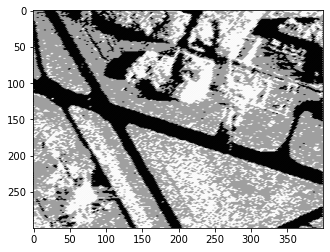

In [11]:
plt.imshow(res2, cmap="gray")

# Watershed+Distance transform

In [5]:
image = cv2.imread('oranges_1.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 

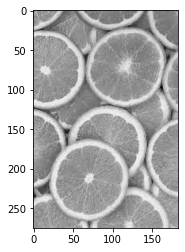

In [6]:
plt.imshow(image_gray, cmap="gray")

In [7]:
ret, thresh = cv2.threshold(image_gray,0,255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

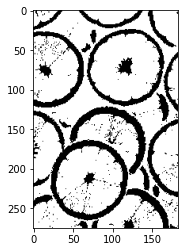

In [8]:
plt.imshow(thresh, cmap="gray")

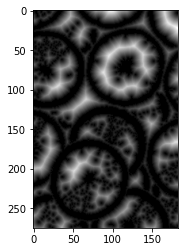

In [9]:
dist = cv2.distanceTransform(thresh, cv2.DIST_L2, 5) 
plt.imshow(dist, cmap="gray")

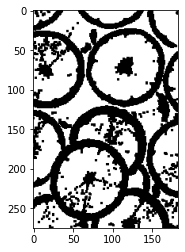

In [11]:
ret, sure_fg = cv2.threshold(dist, 0.1 * dist.max(), 255, cv2.THRESH_BINARY) 
plt.imshow(sure_fg, cmap="gray")

In [20]:
sure_fg = sure_fg.astype(np.uint8)

In [21]:
ret, markers = cv2.connectedComponents(sure_fg) 

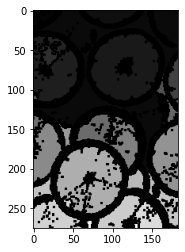

In [22]:
plt.imshow(markers, cmap="gray")

In [30]:
markers = cv2.watershed(image, markers)

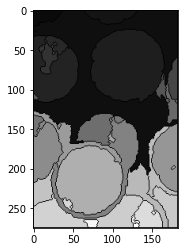

In [34]:
plt.imshow(markers, cmap="gray")

In [35]:
# ДЗ
# 1. Подберите парамтеры алгоритма разрастания регионов так, чтобы был выделен весь участок газона.
# 2. Реализуйте вычисление критерия однородности, отличного от представленного. Сравните результаты.
# 3. Применить алгоритм сегментации watershed+distance transform для задачи подсчета пальмовых деревьев.

In [ ]:
#Сначала изображения в серый

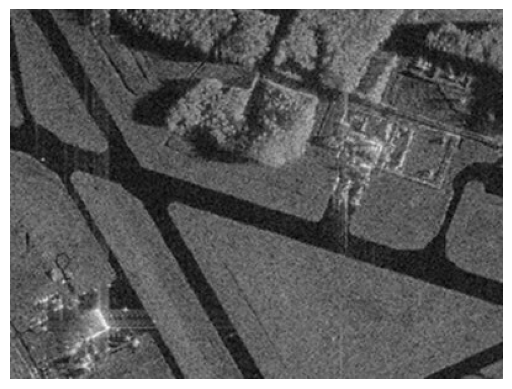

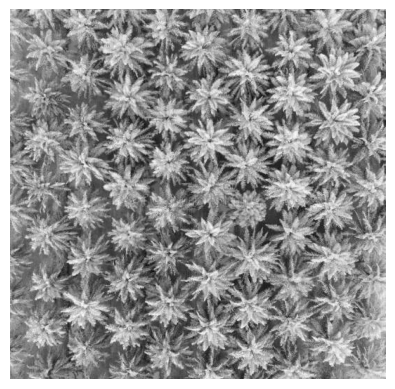

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from collections import deque

image_sar = cv2.imread('sar_1.jpg')
img_sar = cv2.cvtColor(image_sar, cv2.COLOR_BGR2GRAY)

plt.imshow(img_sar, cmap='gray'); plt.axis('off'); 
plt.show()

image_palm = cv2.imread('palm_1.JPG')
img_palm = cv2.cvtColor(image_palm, cv2.COLOR_BGR2GRAY)

plt.imshow(img_palm, cmap='gray'); plt.axis('off'); 
plt.show()


In [ ]:
#1

(np.float64(-0.5), np.float64(399.5), np.float64(299.5), np.float64(-0.5))

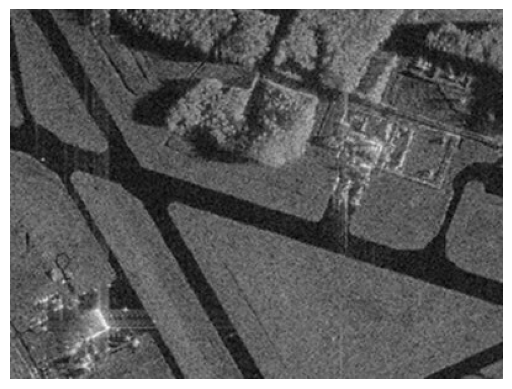

In [31]:


image = cv2.imread('sar_1.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.imshow(image_gray, cmap="gray")
plt.axis("off")


In [39]:

import math

def homo_average(img, mask, point, T):
    av_val = img[mask > 0].sum() / np.count_nonzero(mask > 0)
    if abs(av_val - img[point]) <= T:
        return True
    return False


In [40]:

def region_growing(image, seed_point, homo_fun, r, T):
    mask = np.zeros(image_gray.shape, np.uint8)
    mask[seed_point] = 1
    count = 1
    while count > 0:
        count = 0
        local_mask = np.zeros(image_gray.shape, np.uint8)
        for i in range(r, image.shape[0] - r):
            for j in range(r, image.shape[1] - r):
                if mask[i, j] == 0 and mask[i-r:i+r, j-r:j+r].sum() > 0:
                    if homo_fun(image, mask, (i, j), T):
                        local_mask[i, j] = 1
        count = np.count_nonzero(local_mask)
        print(count)
        mask += local_mask
    return mask * 255


33
83
134
179
228
274
327
378
421
484
519
574
618
664
717
602
571
585
598
605
591
577
574
557
528
534
522
508
492
477
456
442
435
404
449
379
360
332
323
299
281
260
251
242
230
213
199
189
148
81
75
67
64
63
57
51
44
36
29
19
11
0


(np.float64(-0.5), np.float64(399.5), np.float64(299.5), np.float64(-0.5))

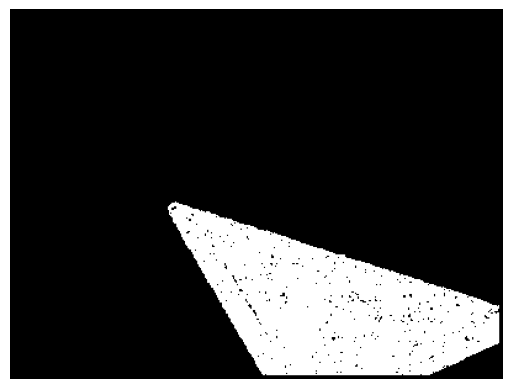

In [41]:

seed_point = (250, 250) 
mask_average = region_growing(image_gray, seed_point, homo_average, 3, 20)

plt.imshow(mask_average, cmap="gray")
plt.axis("off")


In [ ]:
#2

In [36]:
def homo_median(img, mask, point, T):
    region = np.median(img[mask > 0])
    return abs(img[point] - region) <= T


63
160
259
352
448
549
645
745
850
936
1040
883
842
868
860
836
804
780
737
713
682
656
626
589
554
508
479
436
405
383
356
334
307
276
284
227
117
73
58
39
15
0


(np.float64(-0.5), np.float64(399.5), np.float64(299.5), np.float64(-0.5))

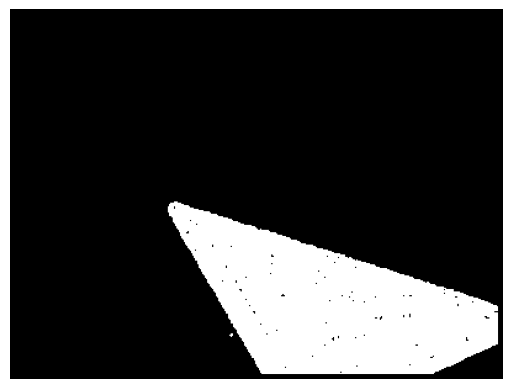

In [37]:
seed_point = (250, 250)
mask_median = region_growing(image_gray, seed_point, homo_median, 4, 25)

plt.imshow(mask_median, cmap="gray")
plt.axis("off")


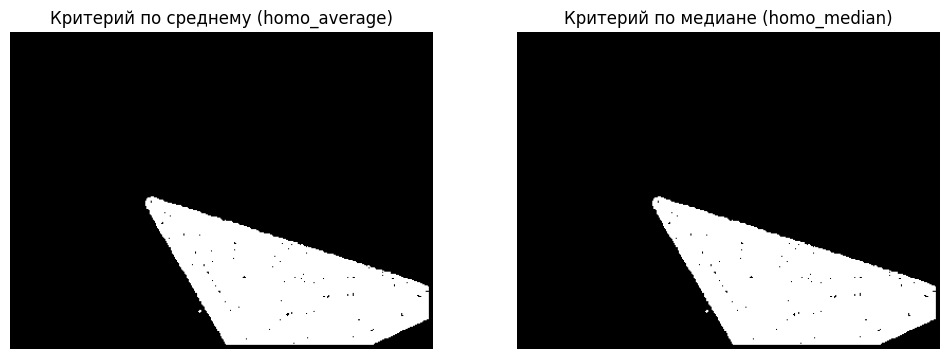

In [38]:
# 3. Сравнение двух критериев
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.title("Критерий по среднему (homo_average)")
plt.imshow(mask_average, cmap="gray")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Критерий по медиане (homo_median)")
plt.imshow(mask_median, cmap="gray")
plt.axis("off")

plt.show()


In [ ]:
#3

Кол-во пальм: 71


(np.float64(-0.5), np.float64(267.5), np.float64(263.5), np.float64(-0.5))

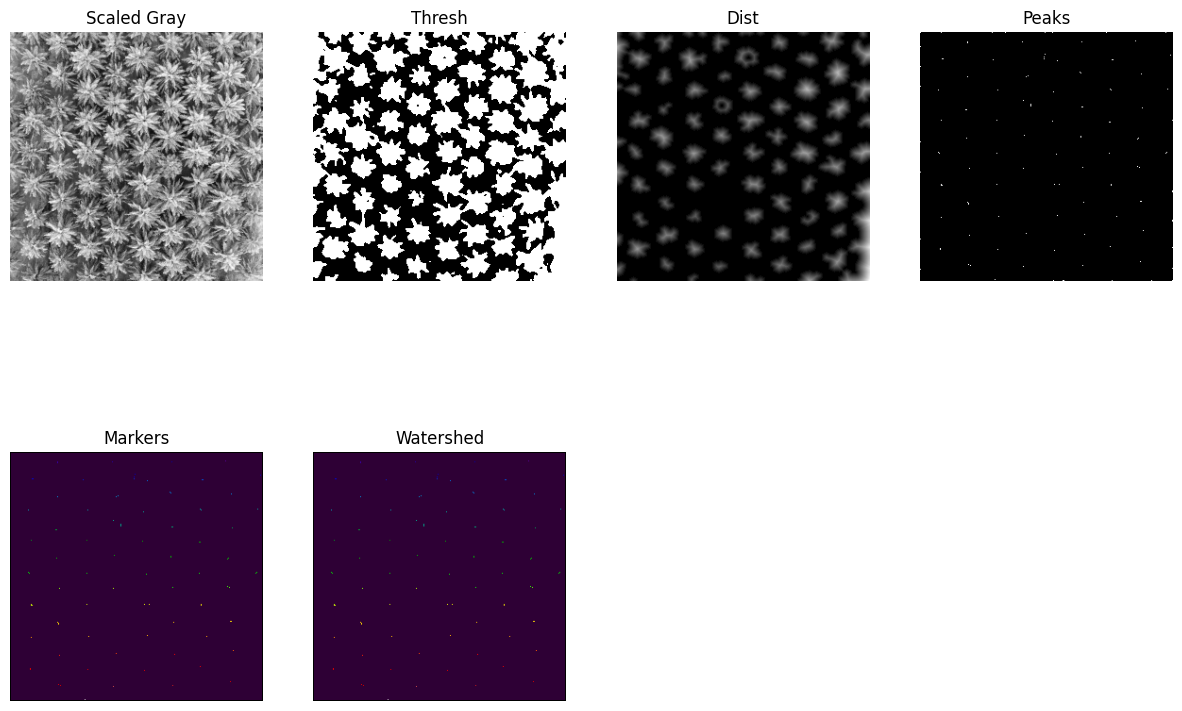

In [42]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img  = cv2.imread('palm_1.JPG')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

scaled = cv2.resize(gray, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_AREA)

blur = cv2.GaussianBlur(scaled, (7,7), 0)

_, thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
if np.mean(scaled[thresh == 255]) < np.mean(scaled[thresh == 0]):
    thresh = cv2.bitwise_not(thresh)

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

dist = cv2.distanceTransform(opening, cv2.DIST_L2, 5)

kernel_lm = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(15,15))
dil = cv2.dilate(dist, kernel_lm)
local_max = (dist == dil)

peaks = np.zeros_like(dist, np.uint8)
peaks[local_max & (dist > 0.25*dist.max())] = 255

ret, markers = cv2.connectedComponents(peaks)

markers = markers + 1
markers[opening == 0] = 0

ws = cv2.watershed(cv2.cvtColor(scaled, cv2.COLOR_GRAY2BGR), markers)

# считаем области > 1 (1 – фон)
labels = np.unique(ws)
tree_labels = [l for l in labels if l > 1]

print("Кол-во пальм:", len(tree_labels))

plt.figure(figsize=(15,10))
plt.subplot(2,4,1); plt.title("Scaled Gray"); plt.imshow(scaled,cmap='gray'); plt.axis('off')
plt.subplot(2,4,2); plt.title("Thresh"); plt.imshow(thresh,cmap='gray'); plt.axis('off')
plt.subplot(2,4,3); plt.title("Dist"); plt.imshow(dist,cmap='gray'); plt.axis('off')
plt.subplot(2,4,4); plt.title("Peaks"); plt.imshow(peaks,cmap='gray'); plt.axis('off')
plt.subplot(2,4,5); plt.title("Markers"); plt.imshow(markers,cmap='nipy_spectral'); plt.axis('off')
plt.subplot(2,4,6); plt.title("Watershed"); plt.imshow(ws,cmap='nipy_spectral'); plt.axis('off')
